In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pk
import prettytable
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rfc

In [2]:
#read the stored features
df_final_train = pd.read_hdf('data/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = pd.read_hdf('data/storage_sample_stage4.h5', 'test_df',mode='r')
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [3]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

#drop the unwanted columns
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9124631578947369 test Score 0.868819176108455
Estimators =  50 Train Score 0.9240865404970575 test Score 0.9014697642343004
Estimators =  100 Train Score 0.9241865075180835 test Score 0.9017164708156996
Estimators =  250 Train Score 0.9276877357894071 test Score 0.9001573852489058
Estimators =  450 Train Score 0.9296561317722439 test Score 0.8981110846658157


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

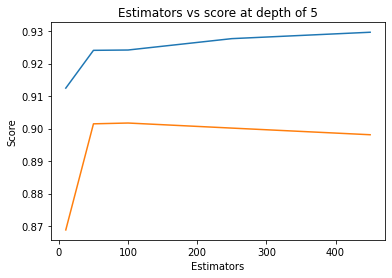

In [4]:
#warnings.filterwarnings("ignore")
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clasifier = rfc(bootstrap=True, class_weight=None, criterion='gini',max_depth=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0,min_samples_leaf=52, min_samples_split=120,min_weight_fraction_leaf=0.0, n_estimators=i, 
                    n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    
    clasifier.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clasifier.predict(df_final_train))
    test_sc = f1_score(y_test,clasifier.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
    
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8722415049063718 test Score 0.8468952855550455
depth =  9 Train Score 0.9829038175055991 test Score 0.8923429175289507
depth =  11 Train Score 0.9896575314902009 test Score 0.8897611749399079
depth =  15 Train Score 0.994314769588021 test Score 0.8905434279798224
depth =  20 Train Score 0.9957826990725935 test Score 0.892275886337644
depth =  35 Train Score 0.995732688406304 test Score 0.8921973961998592
depth =  50 Train Score 0.995732688406304 test Score 0.8921973961998592
depth =  70 Train Score 0.995732688406304 test Score 0.8921973961998592
depth =  130 Train Score 0.995732688406304 test Score 0.8921973961998592


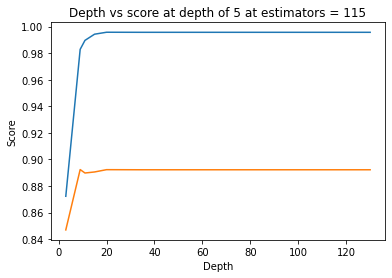

In [5]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clasifier = rfc(bootstrap=True, class_weight=None, criterion='gini',max_depth=i, max_leaf_nodes=None,
            min_impurity_decrease=0.0,min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    
    clasifier.fit(df_final_train,y_train)
    tr_sc = f1_score(y_train,clasifier.predict(df_final_train))
    te_sc = f1_score(y_test,clasifier.predict(df_final_test))
    test_scores.append(te_sc)
    train_scores.append(tr_sc)
    print('depth = ',i,'Train Score',tr_sc,'test Score',te_sc)
    
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [6]:
random_forest_cls = rfc(bootstrap=True, class_weight=None, criterion='gini', max_depth=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
                        oob_score=False, random_state=25, verbose=0, warm_start=False)

random_forest_cls.fit(df_final_train,y_train)
y_train_pred = random_forest_cls.predict(df_final_train)
y_test_pred = random_forest_cls.predict(df_final_test)

In [7]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9950792126740279
Test f1 score 0.891837767654761


In [8]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

Train confusion_matrix


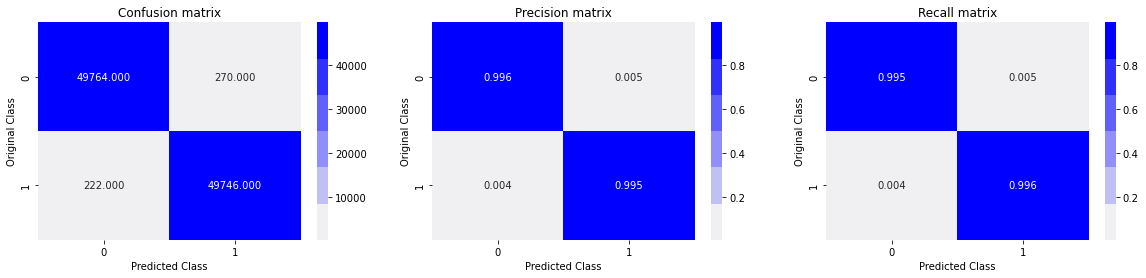

Test confusion_matrix


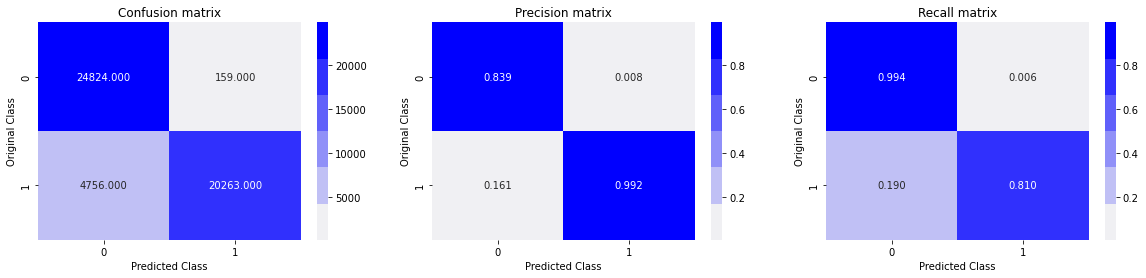

In [9]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

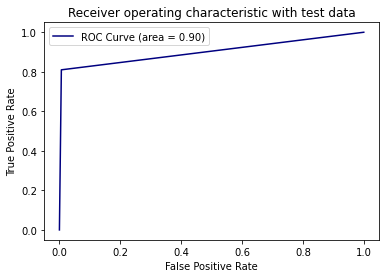

In [10]:
false_pos,true_pos,ths = roc_curve(y_test,y_test_pred)
auc_score = auc(false_pos, true_pos)
plt.plot(false_pos, true_pos, color='navy',label='ROC Curve (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

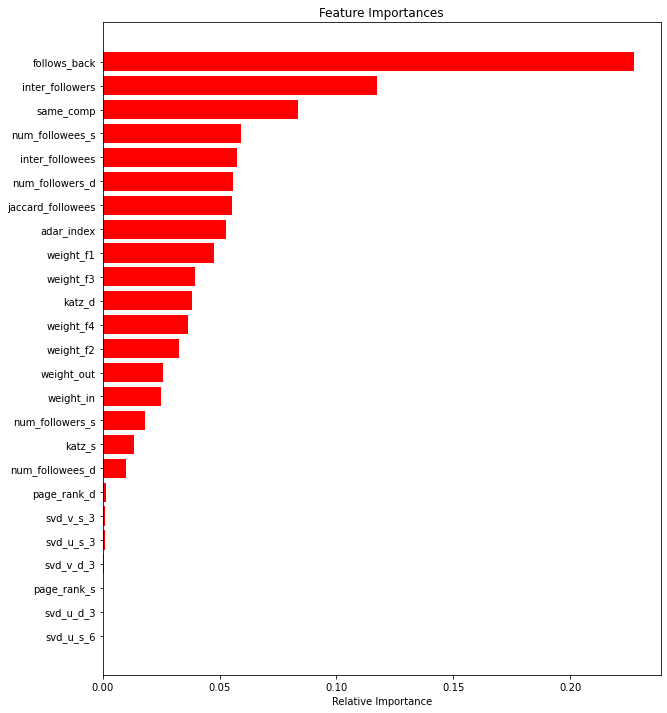

In [12]:
features = df_final_train.columns
importances = random_forest_cls.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
tab = PrettyTable()
tab.field_names=["Model","Train_f1_Score","Test_f1_score"]
tab.add_row(["RandomForest","0.9950792126740279","0.891837767654761"])
print(tab)

+--------------+--------------------+-------------------+
|    Model     |   Train_f1_Score   |   Test_f1_score   |
+--------------+--------------------+-------------------+
| RandomForest | 0.9950792126740279 | 0.891837767654761 |
+--------------+--------------------+-------------------+


In [17]:
#save the trained model
pk.dump(random_forest_cls, open('data/random_forest_model.pkl', 'wb'))

In [ ]:
# load the model from disk
loaded_model = pk.load(open('data/random_forest_model.pkl', 'rb'))
result = loaded_model.score(X_test, Y_test)